# Scikit_Learn 을 이용한 머신러닝

## 추정 API 사용

### 선형 회귀 - 독립 변수들을 가지고 종속 변수의 값을 예측

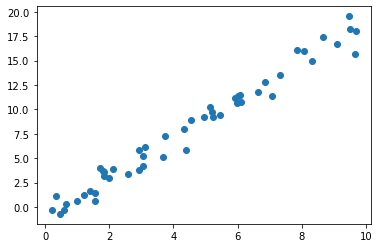

In [2]:
#데이터 생성
import matplotlib.pyplot as plt
import numpy as np

#시드 고정
rng = np.random.RandomState(42)

#대문자 X 는 특징 배열(features, 독립 변수들의 모임)
X = 10 * rng.rand(50)
#소문자 y 는 타겟 배열(target, 종속 변수 )
y = 2 * X - 1 + rng.randn(50)
plt.scatter(X, y)

In [3]:
#추정기 생성
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept = True)
model

LinearRegression()

In [5]:
#데이터 구조 변경
X = X[:, np.newaxis] #1차원을 2차원으로 변경
#독립변수들은 모임으로 간주하기 때문에 특별한 경우가 아니면 2차원 배열이어야 함
print(X.shape)

(50, 1)


In [8]:
#모델 훈련
model.fit(X, y)

#훈련 결과 확인
#하이퍼 파라미터는 속성이 public 
#결과 파라미터는 속성이름 뒤에_가 붙음
#선형 회귀의 결과는 기울기(coef) 와 절편(intercept)
print("기울기:", model.coef_)
print("절편:", model.intercept_)

기울기: [1.9776566]
절편: -0.9033107255311164


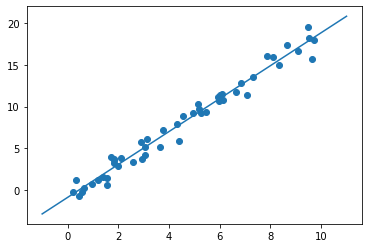

In [9]:
#예측
xfit = np.linspace(-1, 11)
Xfit = xfit[:, np.newaxis]
yfit = model.predict(Xfit)

plt.scatter(X, y)
plt.plot(xfit, yfit)

### 분류 실습 - 붓꽃 데이터 이용

In [10]:
#데이터 가져오기
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [11]:
#특징 배열(주어지는 값, 독립 변수, features) 과 타겟(예측할 값, 종속 변수, target) 배열로 분할
X_iris = iris.drop('species', axis=1)
print(X_iris.head())

y_iris = iris['species']
print(y_iris.head())

   sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2
0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: species, dtype: object


In [15]:
#훈련 데이터 와 테스트 데이터로 분할
from sklearn.model_selection import train_test_split
print(X_iris.shape)

Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris, 
                                              random_state = 42)
print(Xtrain.shape)


(150, 4)
(112, 4)


In [16]:
#분류 모델을 생성해서 훈련
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(Xtrain, ytrain)

GaussianNB()

In [17]:
#예측
y_model = model.predict(Xtest)

#평가 지표 확인 - 훈련한 데이터가 아니라 다른 데이터가지고 테스트
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

1.0

### 분류 실습 - sklearn 의 숫자 이미지 분류

In [21]:
from sklearn.datasets import load_digits
digits = load_digits()
#print(digits)

#data 키에 특징 배열이 있습니다.
#target 키에 타켓 배열이 있습니다.

X = digits.data
print(X.shape)
y = digits.target
print(y.shape)

(1797, 64)
(1797,)


In [23]:
# 데이터 분할 - 8:2 비율
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, 
                                                test_size=0.2, 
                                                random_state=42)
print(Xtrain.shape)


(1437, 64)


In [24]:
#모델을 생성해서 훈련
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

In [25]:
#평가 지표 확인 - 훈련한 데이터가 아니라 다른 데이터 가지고 확인
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.8472222222222222

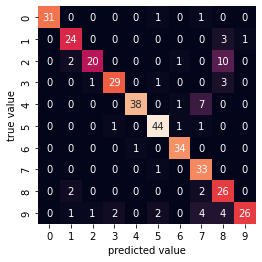

In [26]:
#오차 행렬을 heatmap으로 출력
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(ytest, y_model)

sns.heatmap(mat, square=True, annot=True, cbar=False)

plt.xlabel('predicted value')
plt.ylabel('true value')
plt.show()

### 붓꽃 데이터의 주성분 분석

In [28]:
from sklearn.decomposition import PCA

#모델 생성
model = PCA(n_components=2) #n_components 는 주성분의 개수

#훈련
model.fit(X_iris)

#비지도 학습은 predict 가 아니고 transform을 호출해서 확인
X_2D = model.transform(X_iris)

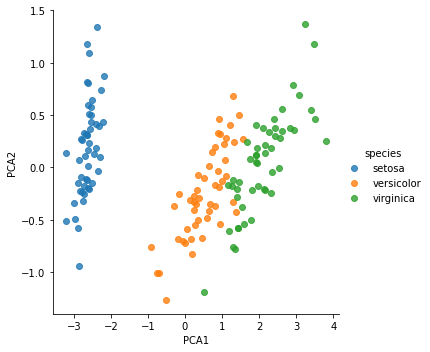

In [29]:
#비지도 학습은 시각화를 이용해서 평가

#새로 만들어진 성분을 기존 데이터에 추가
iris['PCA1'] = X_2D[:, 0]
iris['PCA2'] = X_2D[:, 1]

sns.lmplot(x='PCA1', y='PCA2', hue='species', data=iris, fit_reg=False)

### 군집 - 붓꽃 데이터의 군집 - PCA1 과 PCA2를 이용해서 군집

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


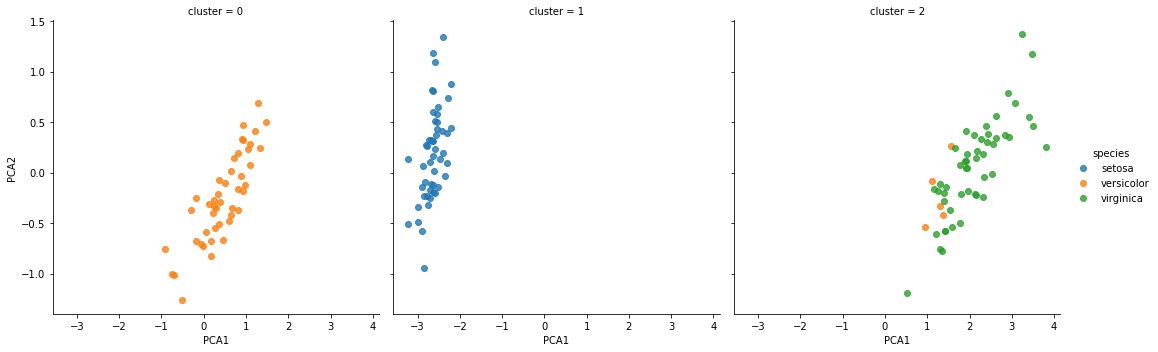

In [31]:
from sklearn.mixture import GaussianMixture

model = GaussianMixture(n_components = 3, covariance_type='full')

model.fit(X_iris)

y_gmm = model.predict(X_iris)

#예측 결과를 기존 데이터에 추가
iris['cluster'] = y_gmm
#시각화
sns.lmplot("PCA1", "PCA2", data=iris, hue='species', 
          col='cluster', fit_reg=False)

## Machine Learning 전체 과정

### 데이터 수집

In [32]:
#housing.csv
import pandas as pd

housing = pd.read_csv('./data/housing.csv')
print(housing.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  


### 데이터 탐색

In [33]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [34]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [35]:
print(housing.describe()) #범위나 각 숫자의 크기를 확인

          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.00000

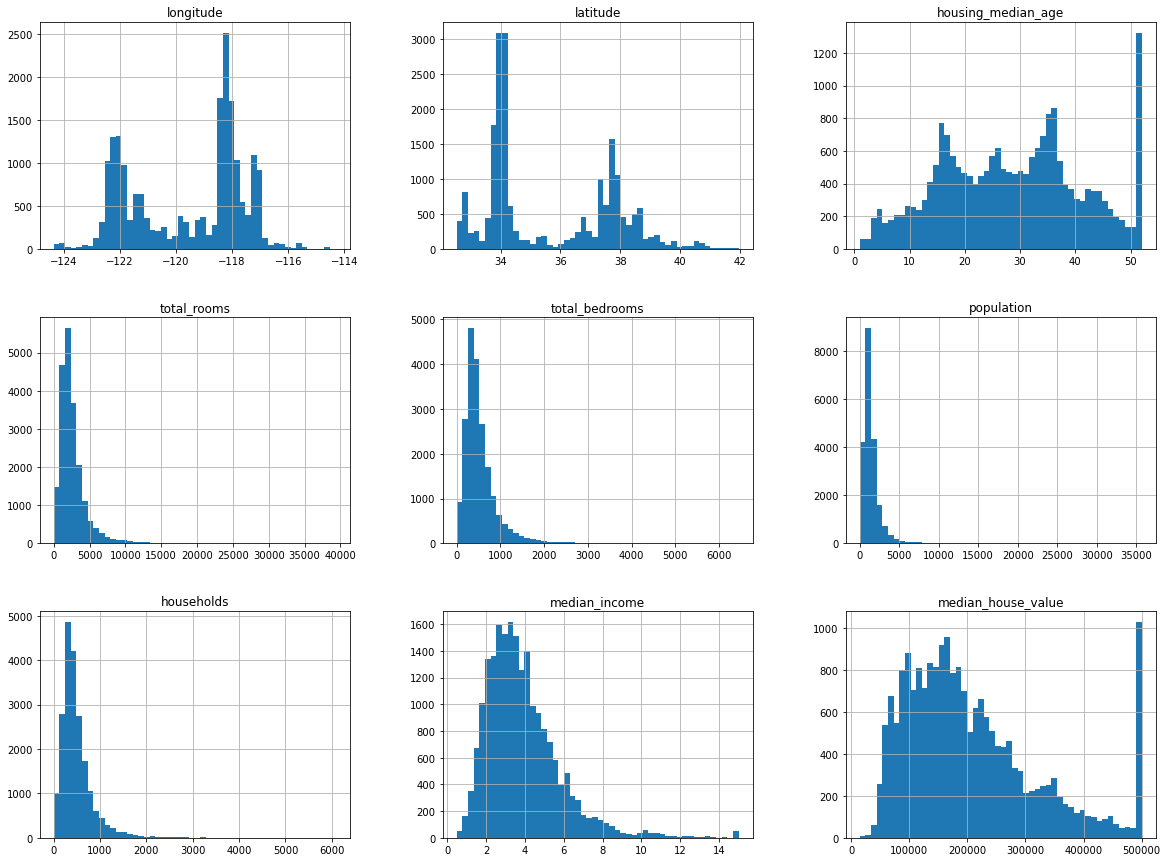

In [36]:
#히스토그램 출력
import matplotlib.pyplot as plt

housing.hist(bins=50, figsize=(20, 15))
plt.show()

### 훈련 데이터 와 테스트 데이터 분리

In [37]:
np.random.seed(42)

#데이터 와 테스트 데이터의 비율을 받아서 분할해서 리턴하는 함수
def split_train_test(data, test_ratio):
    #data를 무작위로 섞기
    shuffled_indices = np.random.permutation(len(data))
    
    #입력받은 비율을 원래 데이터의 크기에 곱해서 테스트 데이터의 크기 생성
    test_set_size = int(len(data) * test_ratio)
    #랜덤하게 섞인 데이터에서 테스트 데이터의 크기 만큼 앞에서 인덱스를 추출
    test_indices = shuffled_indices[:test_set_size]
    #랜덤하게 섞인 데이터에서 훈련 데이터의 크기 만큼 인덱스를 추출
    #테스트 데이터를 제외하고 모두 가져옵니다.
    train_indices = shuffled_indices[test_set_size:]
    
    #훈련 데이터 와 테스트 데이터를 리턴
    return data.iloc[train_indices], data.iloc[test_indices]

train_set, test_set = split_train_test(housing, 0.2)
print(len(train_set), ":", len(test_set))

16512 : 4128


In [39]:
#scikit_learn 이 제공해주는 함수를 이용해서 분할
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2,
                                      random_state = 42)
print(len(train_set), ":", len(test_set))

16512 : 4128


In [45]:
#median_income 을 범주화 해서 계층적 샘플링 수행

#값의 개수 확인
#print(housing['median_income'].value_counts())

#연속형 데이터의 범주화 - binning
housing['income_cat'] = pd.cut(housing['median_income'], 
                              bins=[0, 1.5, 3.0, 4.5, 6, np.inf],
                              labels=[1, 2, 3, 4, 5])
print(housing['income_cat'].value_counts()/len(housing['income_cat']))

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64


In [46]:
from sklearn.model_selection import StratifiedShuffleSplit

#계층적 샘플링을 위한 객체 생성
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
#housing 데이터를 나눌 때 income_cat 비율대로 분할
for train_index, test_index in split.split(housing, housing['income_cat']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]    
strat_train_set['income_cat'].value_counts()/len(strat_train_set['income_cat'])

3    0.350594
2    0.318859
4    0.176296
5    0.114462
1    0.039789
Name: income_cat, dtype: float64

### 데이터 탐색 - 시각화

In [47]:
#그래프에 한글 과 음수를 출력하기 위한 코드
import platform
from matplotlib import font_manager, rc
import matplotlib
#매킨토시의 경우
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
#윈도우의 경우
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
#우분투 리눅스의 경우
else:
    font_name = '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf'
    rc('font', family=font_name)
    
#음수 출력
matplotlib.rcParams['axes.unicode_minus'] = False


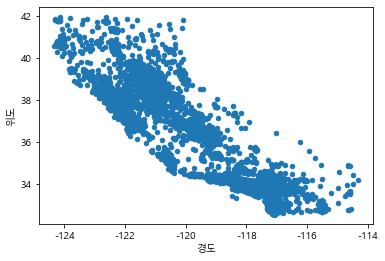

In [48]:
housing = strat_train_set.copy()
ax = housing.plot(kind = 'scatter', x = 'longitude', y='latitude')
ax.set(xlabel='경도', ylabel='위도')
plt.show()

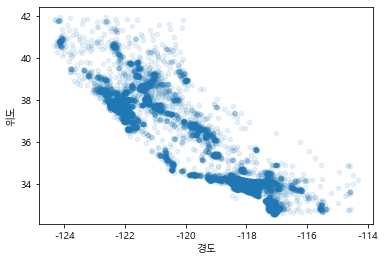

In [49]:
housing = strat_train_set.copy()
ax = housing.plot(kind = 'scatter',
                  x = 'longitude', y='latitude', alpha=0.1)
ax.set(xlabel='경도', ylabel='위도')
plt.show()

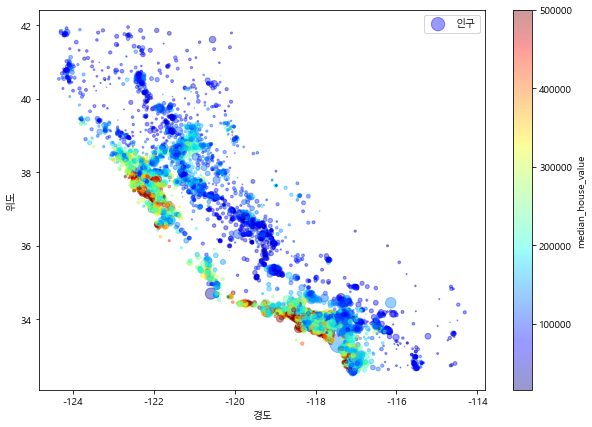

In [50]:
ax = housing.plot(kind='scatter', x='longitude', y='latitude', 
                 alpha=0.4, s=housing['population']/100, 
                 label='인구', figsize=(10, 7),
                 c='median_house_value', cmap=plt.get_cmap('jet'),
                 colorbar=True, sharex=False)
ax.set(xlabel='경도', ylabel='위도')
plt.legend()
plt.show()

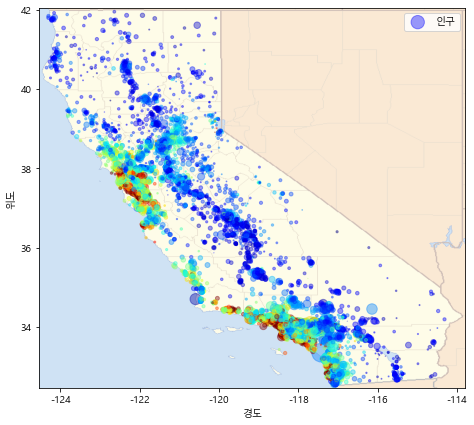

In [53]:
#지도와 함께 출력

#이미지 출력 준비
import matplotlib.image as mpimg


ax = housing.plot(kind='scatter', x='longitude', y='latitude', 
                 alpha=0.4, s=housing['population']/100, 
                 label='인구', figsize=(10, 7),
                 c='median_house_value', cmap=plt.get_cmap('jet'),
                 colorbar=False)

california_img = mpimg.imread('./data/california.png')
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], 
           alpha=0.5)
plt.xlabel("경도")
plt.ylabel("위도")

plt.legend()
plt.show()

# 지도 와 함께 출력을 하게되면 군집 같은 것을 할 때 중심점의 개수나
# 위치를 설정하는데 많은 도움이 됩니다.

In [54]:
# 상관 계수 확인
corr_matrix = housing.corr()
print(corr_matrix)

                    longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.924478           -0.105823     0.048909   
latitude            -0.924478  1.000000            0.005737    -0.039245   
housing_median_age  -0.105823  0.005737            1.000000    -0.364535   
total_rooms          0.048909 -0.039245           -0.364535     1.000000   
total_bedrooms       0.076686 -0.072550           -0.325101     0.929391   
population           0.108071 -0.115290           -0.298737     0.855103   
households           0.063146 -0.077765           -0.306473     0.918396   
median_income       -0.019615 -0.075146           -0.111315     0.200133   
median_house_value  -0.047466 -0.142673            0.114146     0.135140   

                    total_bedrooms  population  households  median_income  \
longitude                 0.076686    0.108071    0.063146      -0.019615   
latitude                 -0.072550   -0.115290   -0.077765      -0.075146   
housing_

In [55]:
print(corr_matrix['median_house_value'].sort_values(ascending=False))

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64


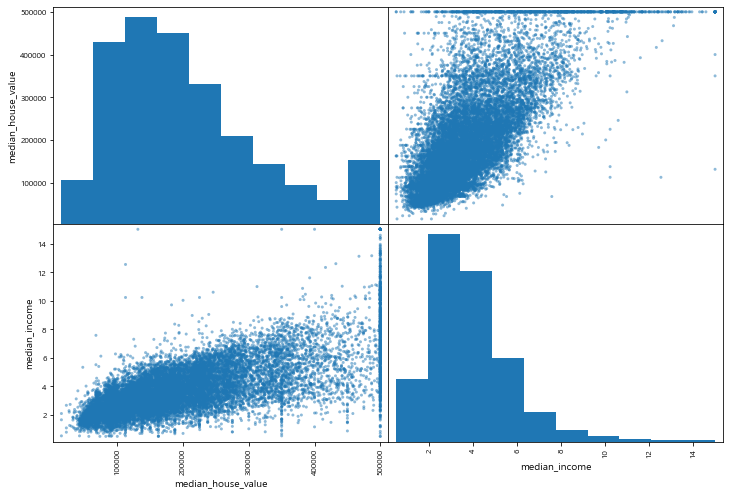

In [58]:
#상관 계수 시각화
from pandas.plotting import scatter_matrix

scatter_matrix(housing[['median_house_value', 'median_income']]
               , figsize=(12, 8))
plt.show()

In [60]:
#새로운 특성 추가
housing['rooms_per_household'] = housing['total_rooms']/housing['households']
housing['bedrooms_per_room'] = housing['total_bedrooms']/housing['total_rooms']
housing['population_per_household'] = housing['population']/housing['households']

corr_matrix = housing.corr()
print(corr_matrix['median_house_value'].sort_values())


bedrooms_per_room          -0.259952
latitude                   -0.142673
longitude                  -0.047466
population                 -0.026882
population_per_household   -0.021991
total_bedrooms              0.047781
households                  0.064590
housing_median_age          0.114146
total_rooms                 0.135140
rooms_per_household         0.146255
median_income               0.687151
median_house_value          1.000000
Name: median_house_value, dtype: float64


### 특성 배열 과 타겟 배열 생성

In [61]:
housing = strat_train_set.drop('median_house_value', axis=1)
housing_labels = strat_train_set['median_house_value'].copy()

### 결측치 처리

In [62]:
#결측치 찾기
sample_incomplete_rows = housing[housing.isnull().any(axis=1)].head()
print(sample_incomplete_rows)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
1606     -122.08     37.88                26.0       2947.0             NaN   
10915    -117.87     33.73                45.0       2264.0             NaN   
19150    -122.70     38.35                14.0       2313.0             NaN   
4186     -118.23     34.13                48.0       1308.0             NaN   
16885    -122.40     37.58                26.0       3281.0             NaN   

       population  households  median_income ocean_proximity income_cat  
1606        825.0       626.0         2.9330        NEAR BAY          2  
10915      1970.0       499.0         3.4193       <1H OCEAN          3  
19150       954.0       397.0         3.7813       <1H OCEAN          3  
4186        835.0       294.0         4.2891       <1H OCEAN          3  
16885      1145.0       480.0         6.3580      NEAR OCEAN          5  


In [64]:
#total_bedrooms 가 결측치인 데이터를 제거
housing.dropna(subset=['total_bedrooms'])

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,INLAND,2
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,NEAR OCEAN,5
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,INLAND,2
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,NEAR OCEAN,2
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,<1H OCEAN,3
...,...,...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900,<1H OCEAN,4
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139,INLAND,2
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797,<1H OCEAN,3
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964,<1H OCEAN,3


In [65]:
#열 제거
sample_incomplete_rows.drop('total_bedrooms', axis=1)

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity,income_cat
1606,-122.08,37.88,26.0,2947.0,825.0,626.0,2.9330,NEAR BAY,2
10915,-117.87,33.73,45.0,2264.0,1970.0,499.0,3.4193,<1H OCEAN,3
19150,-122.70,38.35,14.0,2313.0,954.0,397.0,3.7813,<1H OCEAN,3
4186,-118.23,34.13,48.0,1308.0,835.0,294.0,4.2891,<1H OCEAN,3
16885,-122.40,37.58,26.0,3281.0,1145.0,480.0,6.3580,NEAR OCEAN,5


In [66]:
#특정 값으로 대체 - 중간값 대체
median = housing['total_bedrooms'].median()
housing['total_bedrooms'].fillna(median)[1606]

433.0

In [70]:
#sklearn 의 impute.SimpleImputer를 이용한 결측치 대체
from sklearn.impute import SimpleImputer

#중간값으로 None을 대체하는 객체 생성
imputer = SimpleImputer(strategy = 'median')


#숫자가 아닌 컬럼 제거
housing_num = housing.drop('ocean_proximity', axis=1)

#추정
imputer.fit(housing_num)

#추정값
print(imputer.statistics_)
print(housing_num.median().values)

X = imputer.transform(housing_num)
housing_tr = pd.DataFrame(X, columns=housing_num.columns, 
                         index = list(housing.index.values))
housing_tr.info()

[-118.51      34.26      29.      2119.       433.      1164.
  408.         3.54155    3.     ]
[-118.51      34.26      29.      2119.       433.      1164.
  408.         3.54155]
<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 12655 to 19773
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   income_cat          16512 non-null  float64
dtypes: float64(9)
memory usage: 1.3 MB


C:\Users\tj\AppData\Local\Temp/ipykernel_6952/3477678106.py:16: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(housing_num.median().values)


### 범주형 데이터 처리

In [71]:
housing_cat = housing['ocean_proximity']
print(housing_cat.head())

12655        INLAND
15502    NEAR OCEAN
2908         INLAND
14053    NEAR OCEAN
20496     <1H OCEAN
Name: ocean_proximity, dtype: object


In [72]:
housing_cat_encoded, housing_categories = housing_cat.factorize()
print(housing_cat_encoded[:10])

[0 1 0 1 2 3 2 2 2 2]


In [73]:
print(housing_categories)

Index(['INLAND', 'NEAR OCEAN', '<1H OCEAN', 'NEAR BAY', 'ISLAND'], dtype='object')


In [76]:
from sklearn.preprocessing import OrdinalEncoder

housing_cat = housing[['ocean_proximity']]

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
print(housing_cat_encoded[:10])
print(ordinal_encoder.categories_)

[[1.]
 [4.]
 [1.]
 [4.]
 [0.]
 [3.]
 [0.]
 [0.]
 [0.]
 [0.]]
[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)]


In [78]:
#원핫 인코딩
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(categories='auto')

housing_cat_1hot = encoder.fit_transform(
    housing_cat_encoded.reshape(-1, 1))

#희소행렬(sparse matrix)을 확인
print(housing_cat_1hot[:5])

print()

#밀집행렬(dense matrix)을 확인
print(housing_cat_1hot.toarray()[:5])

  (0, 1)	1.0
  (1, 4)	1.0
  (2, 1)	1.0
  (3, 4)	1.0
  (4, 0)	1.0

[[0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0.]]


### 파이프라인

In [81]:
#결측치를 중간값으로 대체하고 표준화를 수행
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('std_scaler', StandardScaler())
])

housing_num_tr = num_pipeline.fit_transform(housing_num)
print(housing_num_tr)

[[-0.94135046  1.34743822  0.02756357 ...  0.55628602 -0.8936472
  -0.95468705]
 [ 1.17178212 -1.19243966 -1.72201763 ...  0.72131799  1.292168
   1.89007821]
 [ 0.26758118 -0.1259716   1.22045984 ... -0.52440722 -0.52543365
  -0.95468705]
 ...
 [-1.5707942   1.31001828  1.53856552 ... -0.86511838 -0.36547546
  -0.00643196]
 [-1.56080303  1.2492109  -1.1653327  ...  0.01061579  0.16826095
  -0.00643196]
 [-1.28105026  2.02567448 -0.13148926 ... -0.79857323 -0.390569
  -0.00643196]]
